# Minimizing churn of subscription product through analysis of financial habits

**Market:** The target audience is the entirety of a company's subscription base. They are the ones companies want to keep.

**Product:**  The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.

**Goal:** The objective of this model is to predict which users are likely to churn so that the company can focus on re-engaging these users with the product. These efforts can be email reminders about the benefit of the product, especially focusing on features that are new or that the user has shown value.

**Business Challenge:**
- In this case study we will be working for a fintech company that provides a subscription product to its users, which allows them to manage their bank accounts, provides them with personalized coupons, inform them of the late low-APR loans available in the market, and educates them on the best available methods to save money( like videos on saving money on taxes, free courses on financial health, etc).

- We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they might be interested in, These features can increase the engagement and interest of our users towards the product.

## Data
- By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the signup process.

## importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('churn_data.csv')

## EDA

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


User is a code so distribution doesn't really matter. We are going to see these distributions a lot better with Histograms so let's do that.

## Data cleaning

Remove any NaN values

In [6]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

Age, credit_score, and rewards_earned columns have NAN values. So let's check the number if there are only a few then we can just drop them.

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

We see that for age there are only 4 values, which is pretty small.

For credit_score, there are 8031 values, which is almost a third of the entire dataset. That's a lot.

And for rewards_earned we have, 3227, which is a little bit more than a tenth of the rows.

So based on these big numbers, I think it just makes sense for our purposes to remove rewards_earned, and remove credit_score from our model-building process.

We are going to also get rid of these 4 rows with missing age values.


In [8]:
dataset = dataset[pd.notnull(dataset['age'])]

In [9]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

### Visualisation

In [10]:
dataset2 = dataset.drop(columns = ['user','churn'])

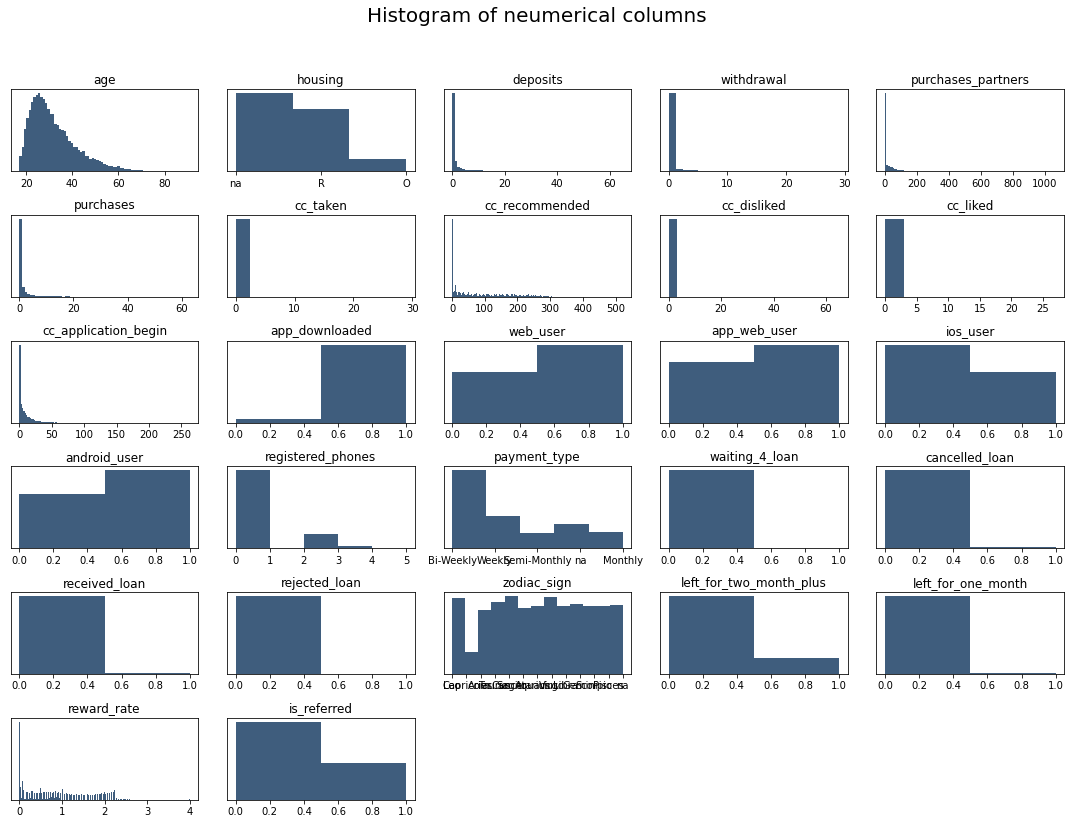

In [11]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histogram of neumerical columns', fontsize=20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals, color="#3F5D7D")

plt.tight_layout(rect=[0,0.03,1,0.95])

- For the age column, everybody is above 18 years old. We have a normal distribution that is right-tailed because the majority of older people don't use these services.

- For the housing column, we see that the majority of people are not owners, a good amount of them are renters and most of them are unclassified.

- For deposits, withdrawals, and purchases columns we see the distribution being very right-tailed. Meaning that majority of people have a zero value meaning no deposits. This data we're working with is usually for the first couple of months of subscription. So activity could be low. And once a person has trusted the system for many months, maybe they will start depositing more.

- For cc_taken, cc_liked, and cc_disliked  majority is either 0 or 1.

- For cc_recommended we see it's more evenly distributed.

- For cc_application_begin, we see more spread in distribution because it is more often the case that people begin the application.

- For some of the binary columns need to do some other visualizations to get better insights from the data.

- For registered phones, the majority are 1. very few for 2/3/4.

- For payment_types we see bi-weekly is the most popular one followed by weekly.

- For zodiac signs is quite evenly distributed. But it's interesting to see there are very less Capricorns than all other signs.

### pie charts

In [12]:
dataset2 = dataset[['housing','is_referred', 'app_downloaded', 'web_user',
                   'app_web_user','ios_user','android_user','registered_phones','payment_type',
                   'waiting_4_loan','cancelled_loan','received_loan','rejected_loan','zodiac_sign',
                   'left_for_two_month_plus','left_for_one_month','is_referred']]

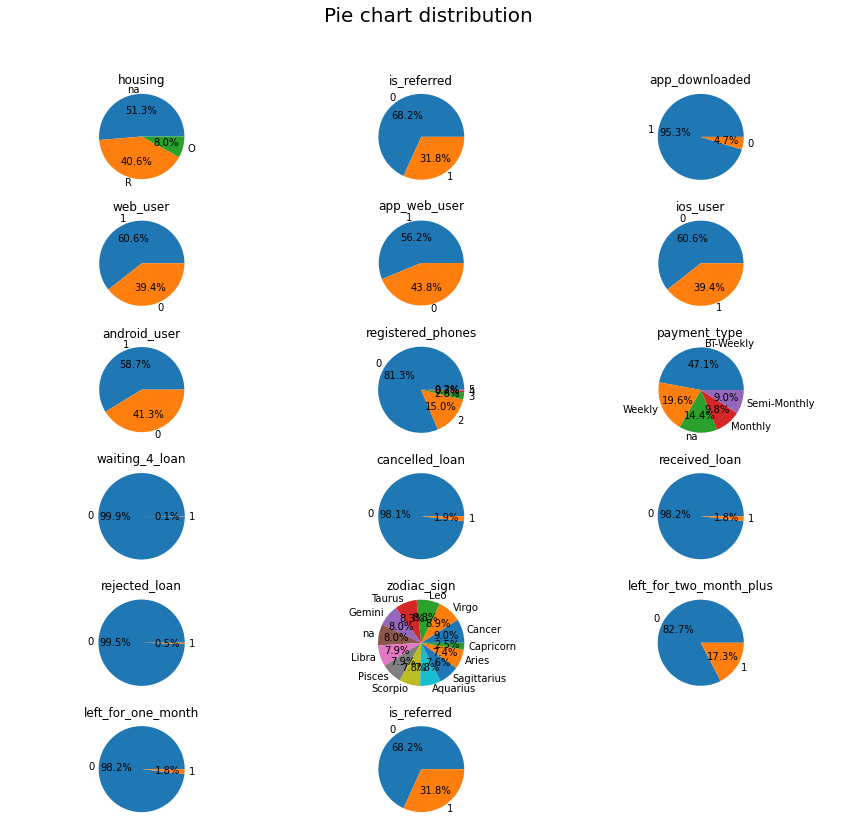

In [13]:
fig = plt.figure(figsize=(12,12))
plt.suptitle('Pie chart distribution', fontsize=20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(6,3,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    
    values = dataset2.iloc[:,i-1].value_counts(normalize = True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])

- There are a few subsets like waiting_4_loan, Cancelled_loan, received_loan, and rejected_loan. In waiting_4_loan has very small subsets like 0.1,  such that there are not enough results for it to include both rows where the term variable is 1. The same can apply to other small subsets. So we need to explore this further to make sure that we can use them in our model.

In [14]:
dataset[dataset2.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [15]:
dataset[dataset2.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [16]:
dataset[dataset2.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [17]:
dataset[dataset2.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
dataset[dataset2.left_for_one_month==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Correlation plot

<AxesSubplot:title={'center':'Correlation with response variable'}>

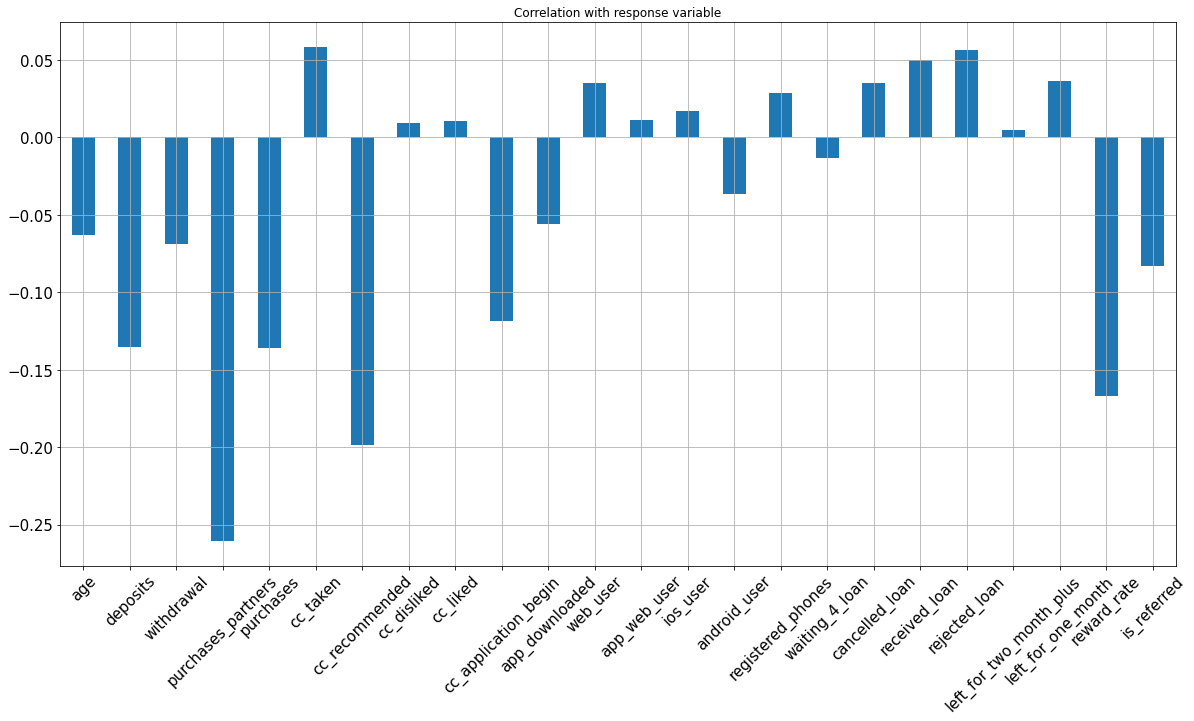

In [19]:
dataset.drop(columns = ['churn', 'user', 'housing',
                        'payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(
                        figsize=(20,10), title='Correlation with response variable', fontsize=15, rot=45, grid=True)

- This plot is telling us that age is negatively correlated to the response variable, churn, the smaller the age it is the most likely for the response variable to be one. So the younger you are, the most likely you are to churn.

- The same we see for deposits, withdrawals, and purchases which are the next three, the smaller amount of deposits, the most likely for you to churn. There are more of them on the withdrawals and purchases. This makes a lot of sense because this means that the less activity you have, the most likely you're going to churn. 

- The next one is cc_taken and this one is interesting to see. This is telling us that if you take a credit card with us, you're going to be more likely to churn. So maybe this is giving us some insights into the fact that people are not very happy with the credit card feature that we have for the credit card product. So this could be interesting to explore further.

- For cc_recommended this means that the fewer recommendations you have, the more likely you are to churn. So if I give you more and more recommendations, you're going to be less likely to churn.
 
- Moving forward, as the application begins, the more applications that you gain, the more likely you are to stay with us.

- If you have downloaded the app, then you're most likely to stay with this.

- We also see the web user, android users, and iOS users as correlating with the response variable, meaning that if you're a Web user, an Apple Web user, or an android web user, you're more likely to turn. But if you're an Android user, you're actually more likely to stay.

- If you have registered more phones, you are more likely to churn. And if you are waiting at this point, you're more likely to stay.

- The strength of the positive correlation is very small it's only around 5%, So these correlations are not strong, but are nice to see. And can give us some educational insights on what relates to the variable and in which way, is more important.

### Correlation Matrix

In [20]:
sns.set_style(style='white')

In [21]:
corr = dataset.drop(columns=['user','churn']).corr()

In [22]:
#generate mask for upper triangle
mask=np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

<AxesSubplot:>

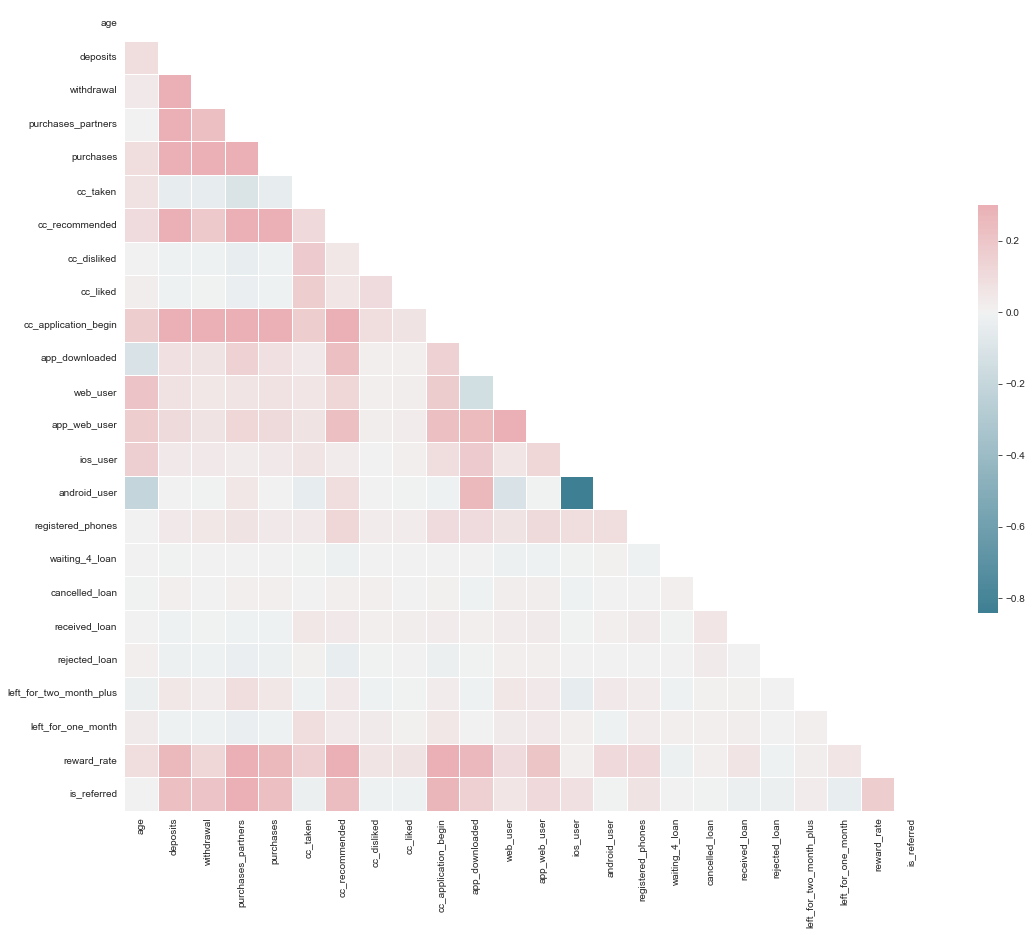

In [23]:
f,ax=plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

The app_web user is 1 only when both the web user and the app downloaded are 1. So this is the dependent variable which is a function of the other two fields. So we will get rid of that column.

In [24]:
dataset = dataset.drop(columns = ['app_web_user'])

In [25]:
dataset.to_csv('new_churn_data.csv', index=False)

## Data preparation

In [26]:
user_identifier = dataset['user']
dataset=dataset.drop(columns=['user'])

In [27]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [28]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [29]:
#to avoide dummy variable trap
dataset = dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset.drop(columns='churn'),
                                                 dataset['churn'],
                                                 test_size=0.2,
                                                 random_state=0)

## Balancing training set 

In [31]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [32]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
import random

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower,higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

### Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc_X = StandardScaler()

X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [35]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,-0.617723,-0.358182,-0.276947,-0.593753,-0.357603,-0.169844,-0.911666,-0.064026,-0.068349,-0.580441,...,-0.311988,-0.156227,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,-0.301291,-0.312204
19770,-0.416039,-0.358182,-0.276947,-0.642808,-0.357603,-0.169844,0.317662,1.174923,-0.068349,-0.580441,...,-0.311988,-0.156227,-0.291916,-0.31188,3.371223,-0.290447,-0.28954,-0.293829,-0.301291,-0.312204
8356,0.289852,-0.358182,-0.276947,-0.642808,-0.357603,-0.169844,2.002298,-0.064026,-0.068349,-0.245933,...,-0.311988,-0.156227,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,-0.301291,3.203037
17887,0.592377,-0.358182,-0.276947,0.043965,-0.357603,-0.169844,-0.183175,-0.064026,-0.068349,0.004948,...,-0.311988,-0.156227,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,3.319055,-0.312204
25153,-0.819406,-0.245285,-0.276947,-0.103201,-0.242590,-0.169844,-0.581569,-0.064026,-0.068349,-0.245933,...,-0.311988,-0.156227,-0.291916,-0.31188,-0.296628,3.442973,-0.28954,-0.293829,-0.301291,-0.312204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25059,-0.718564,-0.358182,-0.276947,1.368455,-0.357603,-0.169844,0.920944,-0.064026,-0.068349,-0.413187,...,3.205253,-0.156227,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,-0.301291,-0.312204
24608,-0.920248,-0.358182,-0.276947,-0.397532,-0.357603,-0.169844,-0.911666,-0.064026,-0.068349,-0.664068,...,-0.311988,-0.156227,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,3.319055,-0.312204
12357,2.508368,3.706105,0.644493,0.289241,3.782885,-0.169844,0.124157,-0.064026,-0.068349,1.593863,...,-0.311988,6.400924,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,-0.301291,-0.312204
11102,0.894902,-0.358182,-0.276947,-0.520170,-0.357603,2.014914,0.898179,2.413872,-0.068349,0.757592,...,-0.311988,-0.156227,-0.291916,-0.31188,-0.296628,-0.290447,-0.28954,-0.293829,-0.301291,-0.312204


In [36]:
X_test

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2835,0.004040,0.868055,-0.291026,-0.655340,0.894374,2.335414,1.227740,-0.058114,-0.039498,1.861847,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275
21022,-0.706304,-0.360500,-0.291026,2.488687,-0.360310,-0.182804,1.693278,-0.058114,-0.039498,-0.406119,...,-0.329203,-0.170762,3.382661,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
5592,1.526208,0.868055,1.672175,-0.680096,0.894374,-0.182804,0.421564,2.199566,-0.039498,2.185842,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,3.288798,-0.311275
15773,0.105518,-0.360500,-0.291026,-0.482047,-0.360310,-0.182804,-1.009114,-0.058114,-0.039498,-0.568116,...,-0.329203,5.856118,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
15123,-1.010738,0.309621,-0.291026,3.206614,0.324063,-0.182804,1.727342,-0.058114,-0.039498,2.104843,...,-0.329203,-0.170762,-0.295625,3.234960,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16094,4.570542,-0.360500,-0.291026,-0.680096,-0.360310,-0.182804,-1.020468,-0.058114,-0.039498,-0.649115,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275
9853,0.612907,-0.248814,0.690574,-0.655340,-0.246248,-0.182804,-1.031823,-0.058114,-0.039498,-0.649115,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
654,0.511429,-0.360500,-0.291026,-0.680096,-0.360310,2.335414,1.273158,-0.058114,-0.039498,-0.082124,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,3.288798,-0.311275
26252,-0.503349,-0.137127,-0.291026,0.334904,-0.132185,-0.182804,-0.305129,-0.058114,-0.039498,-0.406119,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275


## Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm= confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.61

In [40]:
precision_score(y_test, y_pred)

0.5199625701809107

In [41]:
recall_score(y_test, y_pred)

0.7461951656222023

In [42]:
f1_score(y_test, y_pred)

0.6128676470588235

In [43]:
df_cm = pd.DataFrame(cm,index=(0,1),columns=(0,1))
df_cm

,0,1
0,1627,1539
1,567,1667


Test Data Accuracy: 0.6100


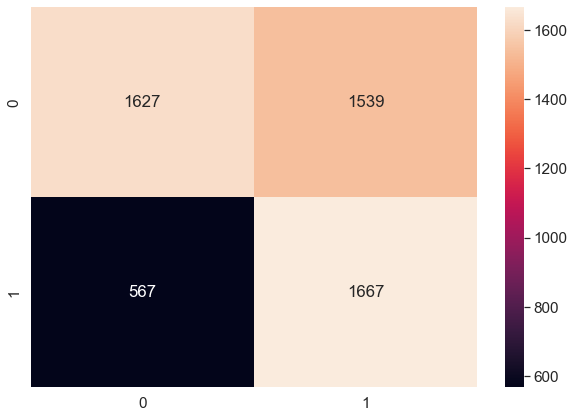

In [44]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred))

### Applying k-fold cross validation

In [45]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X= X_train, y=y_train, cv=10)

In [46]:
accuracies

array([0.63590604, 0.66331096, 0.64876957, 0.62863535, 0.63926174,
       0.64988814, 0.62863535, 0.65268456, 0.64821029, 0.64821029])

In [47]:
accuracies.mean()

0.6443512304250559

In [48]:
pd.concat([pd.DataFrame(X_train.columns, columns=["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns=["coef"])],
          axis=1)

,features,coef
0,age,-0.155607
1,deposits,0.576948
2,withdrawal,0.039649
3,purchases_partners,-0.722407
4,purchases,-0.718530
5,cc_taken,0.090847
6,cc_recommended,0.087520
7,cc_disliked,-0.010780
8,cc_liked,-0.015419
9,cc_application_begin,0.045749


## feature selection

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
classifier = LogisticRegression()

rfe=RFE(estimator=classifier, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [51]:
print(rfe.support_)

[ True  True False  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
 False False False False  True False False False False False False False
 False False False False False]


In [52]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'app_downloaded', 'web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_one_month', 'reward_rate', 'housing_O',
       'payment_type_Weekly'],
      dtype='object')

In [53]:
rfe.ranking_

array([ 1,  1,  6,  1,  1,  1,  1, 19, 13,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  5,  1, 10,  4, 14, 12,  1, 11, 21,  8,  3, 20,
       17, 16,  7, 22, 18, 15,  9])

### model building after feature selection

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

LogisticRegression(random_state=0)

In [55]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm= confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.605

In [57]:
precision_score(y_test, y_pred)

0.5156492097923768

In [58]:
recall_score(y_test, y_pred)

0.7448522829006267

In [59]:
f1_score(y_test, y_pred)

0.6094121955685773

In [60]:
df_cm = pd.DataFrame(cm,index=(0,1),columns=(0,1))
df_cm

,0,1
0,1603,1563
1,570,1664


Test Data Accuracy: 0.6050


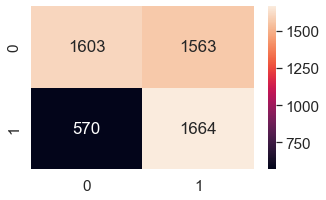

In [61]:

plt.figure(figsize=(5,3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred))

In [62]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns=["coef"])],
          axis=1)

,features,coef
0,age,-0.154826
1,deposits,0.624438
2,purchases_partners,-0.693491
3,purchases,-0.739276
4,cc_taken,0.084916
5,cc_recommended,0.089165
6,cc_application_begin,0.058684
7,app_downloaded,-0.056782
8,web_user,0.132527
9,ios_user,0.149224


From the above analysis, we can see that 20 columns are not giving us anything new in this model. So many of the fields that we have nothing to do with their ability to churn. So they are going to be pretty much useless.

## Final Results

In [63]:
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_results= final_results[['user','churn','predicted_churn']].reset_index(drop=True)

In [64]:
final_results

,user,churn,predicted_churn
0,53016,1.0,1
1,54963,0.0,0
2,10511,0.0,0
3,64269,0.0,1
4,30978,0.0,0
...,...,...,...
5395,50513,1.0,1
5396,42775,0.0,1
5397,15284,1.0,1
5398,10432,1.0,0


# Conclusion

- Our model has provided us with an indication of which users are likely to churn.

  We have purposefully left the date of the expected churn open-ended because we are focused on only gauging the features that indicate disengagement with the product, and not the exact manner in which users will disengage.
  
  In this case study we have chosen this open-ended emphasis to get a sense of those who are even just a bit likely to churn because we are not aiming to create new products for people who are going to leave us for sure, but for people who are starting to lose interest in the app.

- If after creating new product features, we start seeing our model predict that fewer of our users are going to churn, then we can assume our customers are feeling more engaged with what we are offering them.

  We can move forward with these efforts by inquiring about the opinions of our users about our new features eg. Polls. 
  
  If we want to transition into predicting churn more accurately, in order to put emphasis strictly on those leaving us, then we can add a time dimension to churn, which could add more accuracy to our model